#### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

##### Step 1: Load the Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('sales_data_with_discounts.csv')

In [11]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


##### Step 2: Identify Numerical and Categorical Columns

In [17]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns


In [19]:
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [21]:
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

##### Step 3: Calculate mean, median, mode, and standard deviation

In [48]:
stats = data[numerical_cols].agg(['mean','median','std']).T
modes = data[numerical_cols].mode().iloc[0]
stats['mode']=modes
print(stats)

                           mean       median           std          mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801


##### Step 4: Visualizations

##### Histograms:

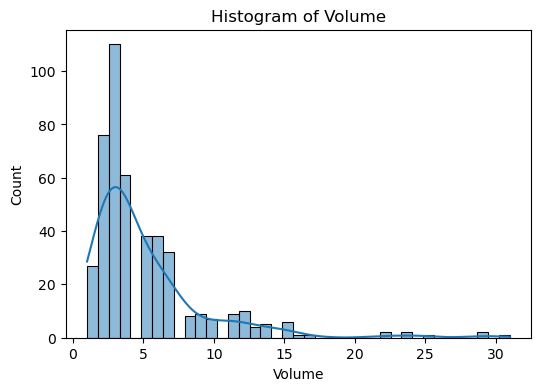

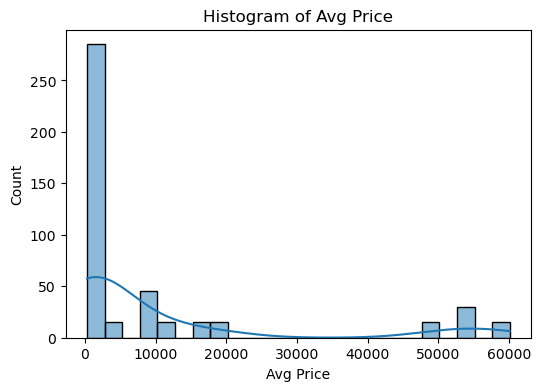

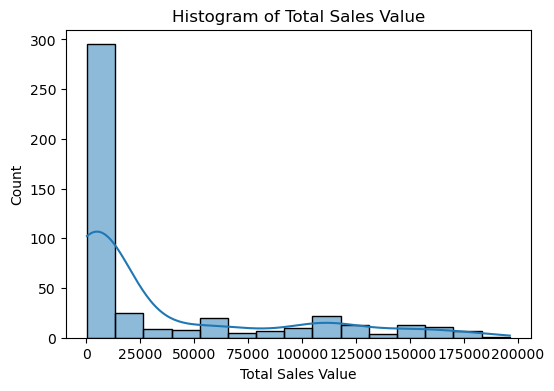

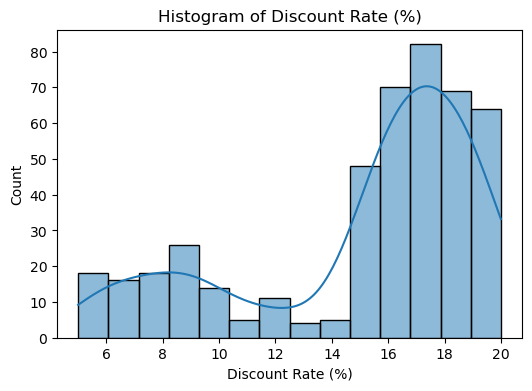

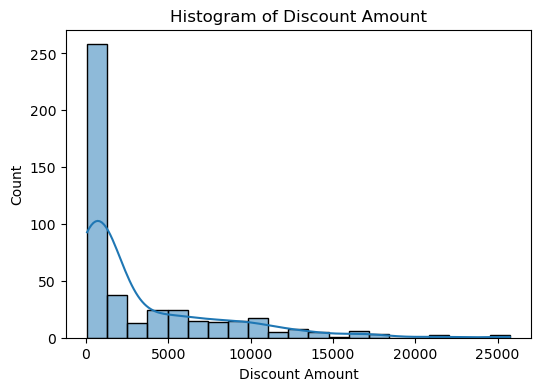

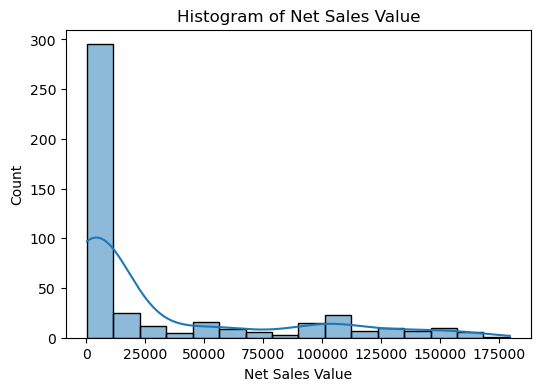

In [89]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

##### Boxplots:

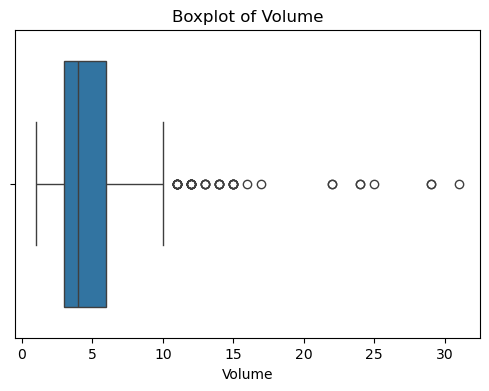

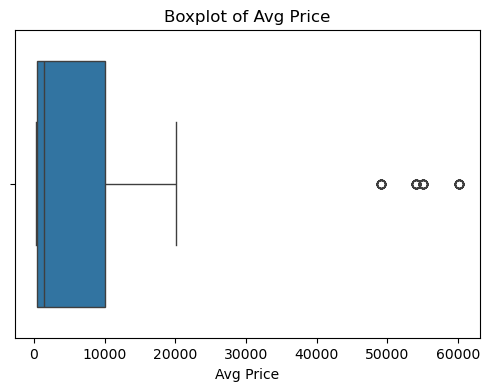

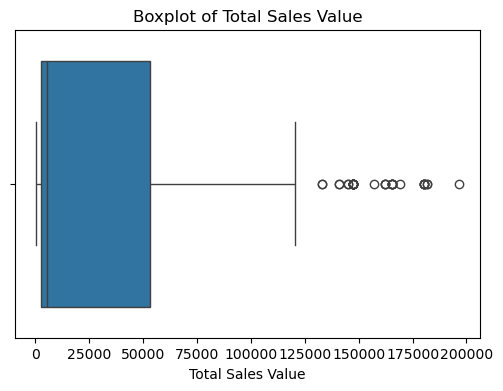

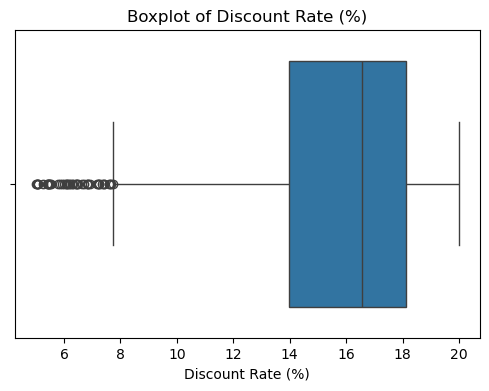

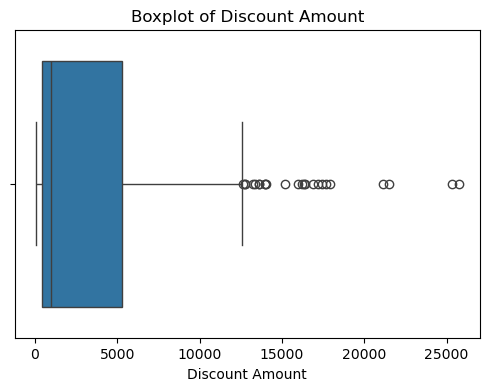

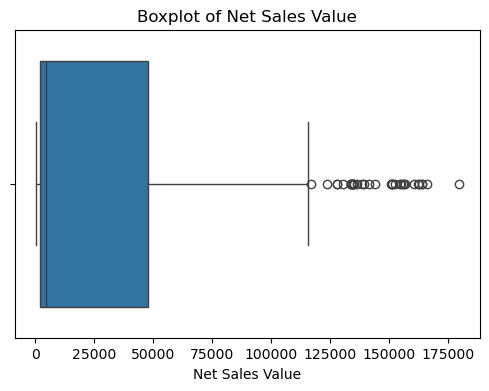

In [87]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##### Bar Charts for Categorical Columns:

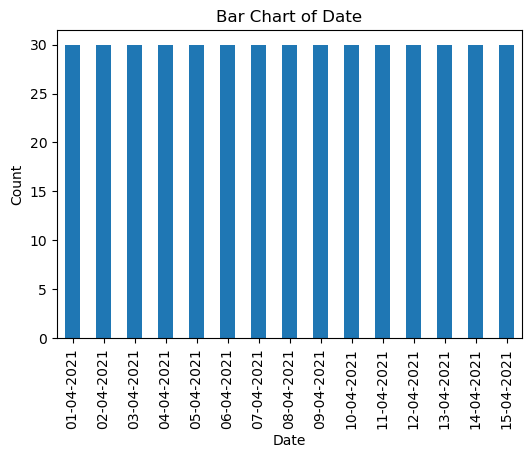

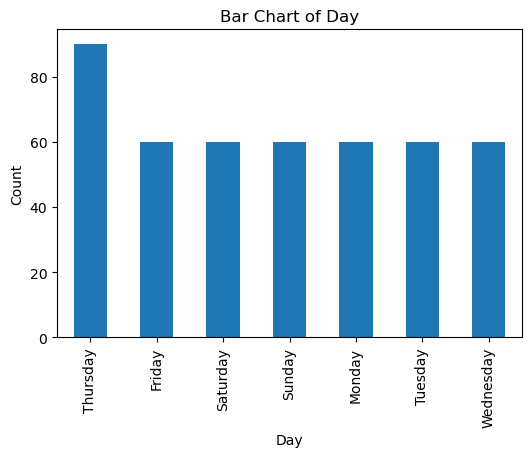

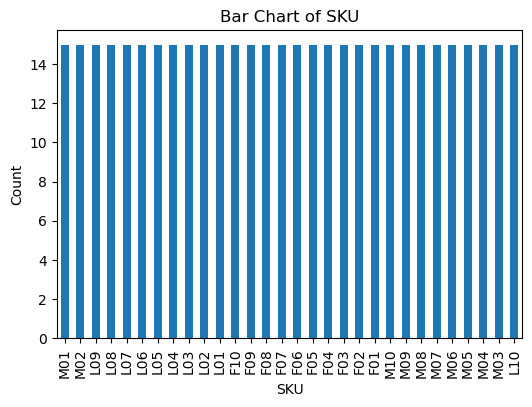

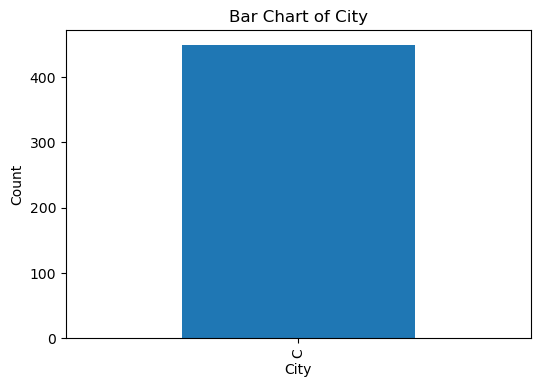

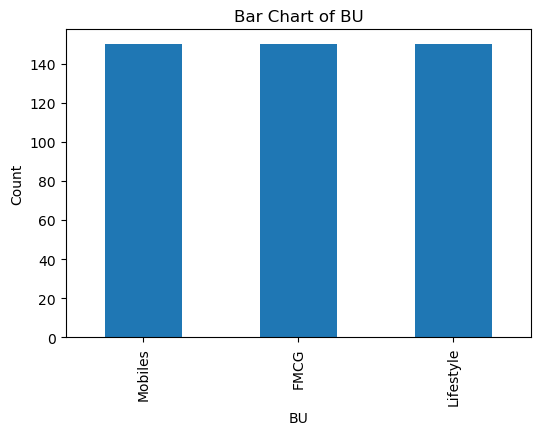

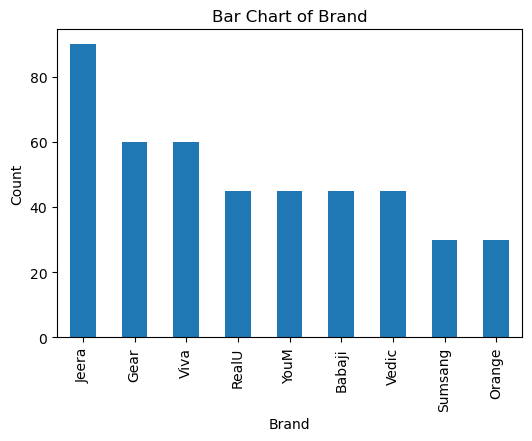

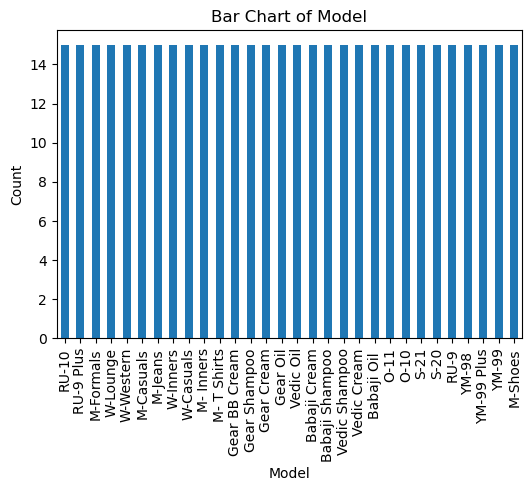

In [94]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.show()

##### Step 5: Standardization

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standarized_data = pd.DataFrame(scaler.fit_transform(data[numerical_cols]),columns=numerical_cols)

In [103]:
standardized_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Volume,450.0,6.118562e-17,1.001113,-0.962092,-0.488932,-0.252352,0.220808,6.135311
Avg Price,450.0,3.157968e-17,1.001113,-0.562765,-0.553075,-0.498534,-0.019570,2.749009
Total Sales Value,450.0,1.578984e-17,1.001113,-0.661917,-0.616353,-0.556923,0.384065,3.220894
Discount Rate (%),450.0,-3.552714e-17,1.001113,-2.406935,-0.282307,0.337418,0.701978,1.147360
Discount Amount,450.0,-5.526444e-17,1.001113,-0.727503,-0.640646,-0.523335,0.437302,4.970494
Net Sales Value,450.0,1.973730e-17,1.001113,-0.650858,-0.610362,-0.556902,0.375354,3.218536


##### Step 6: One-Hot Encoding of Categorical Variables

In [106]:
encoded_data = pd.get_dummies(data[categorical_cols])
transformed_data = pd.concat([data[numerical_cols], encoded_data], axis=1)
print(transformed_data.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

##### Step 7: Conclusion

In [111]:
# Identified key statistical properties.

# Visualized distributions and discovered data patterns.

# Outliers and skewness were identified using boxplots and histograms.

# Standardization brought all numerical data to a uniform scale.

# One-hot encoding prepared categorical data for machine learning models.